In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import nn_perceptron as perceptron
import nn_2layers as mlp_2layers
import nn_generic as nn

# 1. Dataset1

X shape:  (2, 100)
y shape:  (1, 100)


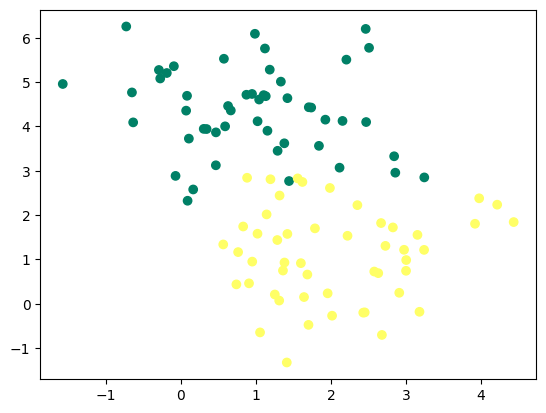

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
print("X shape: ", X.shape)
print("y shape: ", y.shape)

# plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(X[0, :], X[1, :], c=y, cmap="summer")
plt.show()

## 1-1. Train - 1 layer perceptron

100%|██████████| 10000/10000 [00:01<00:00, 8791.54it/s]


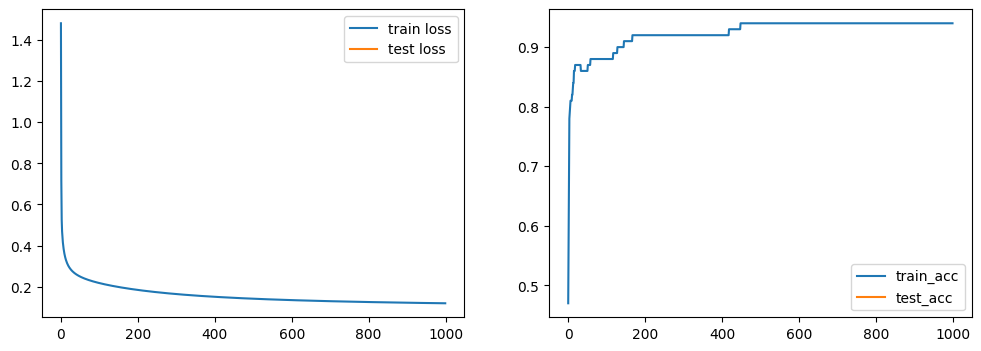

In [4]:
W, b, train_loss, train_acc = perceptron.nn(X.T, y.T, lr=0.03, epochs=10000, plot_graph=True)

## 1-2. Train - 2 layers multilayer perceptron

100%|██████████| 10000/10000 [00:01<00:00, 6605.40it/s]


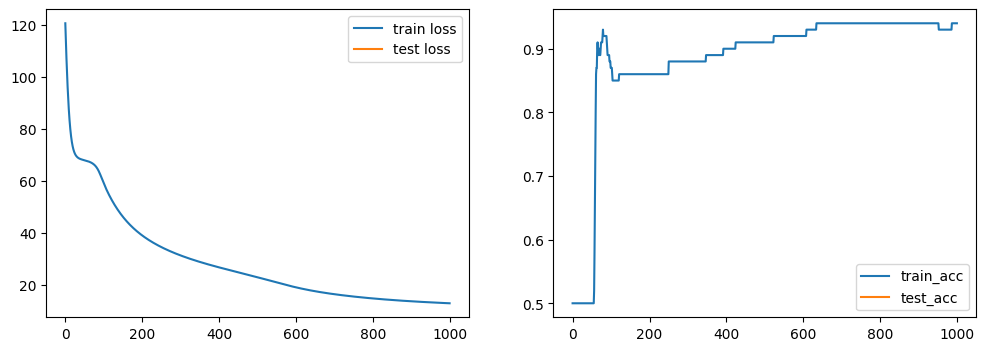

In [5]:
parameters, train_loss, train_acc = mlp_2layers.nn(X, y, n1=2, lr=0.03, epochs=10000, plot_graph=True)

## 1-3. Train - 4 layers multilayer perceptron

100%|██████████| 1000/1000 [00:00<00:00, 1545.89it/s]


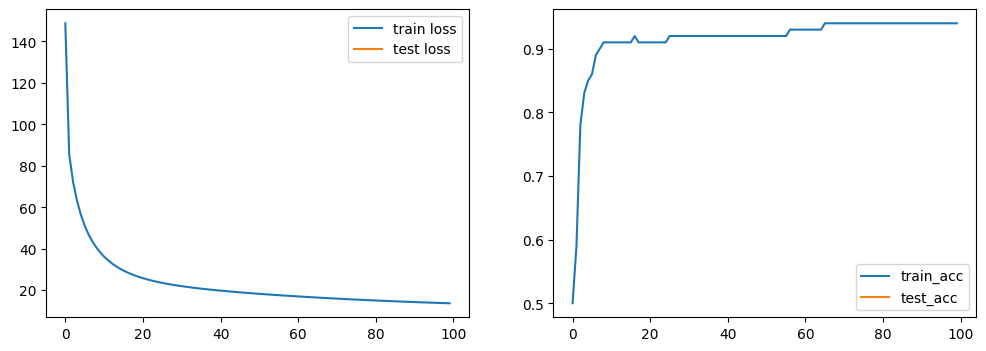

In [6]:
parameters, train_loss, train_acc = nn.nn(X, y, lr=0.03, epochs=1000, plot_graph=True)

## Test with a new data

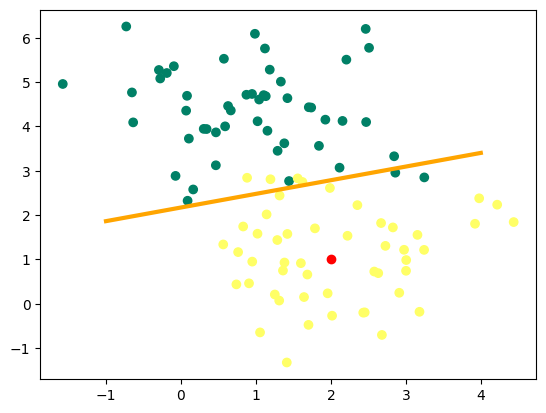

[0.98885962]
[1]


In [4]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c="r")
plt.plot(x0, x1, c="orange", lw=3)
plt.show()

print(perceptron.forward(new_plant, W, b))
print(perceptron.predict(new_plant, W, b))

# 2. Dataset2

X shape:  (2, 100)
y shape:  (1, 100)


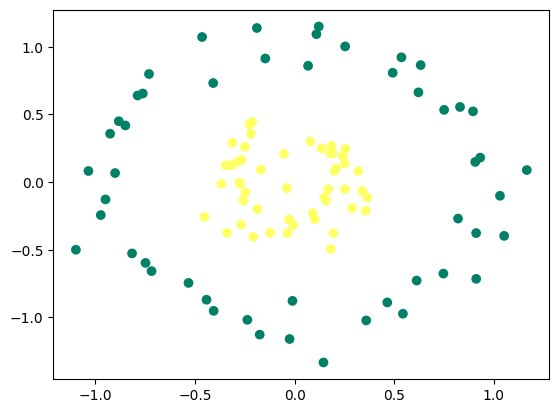

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print("X shape: ", X.shape)
print("y shape: ", y.shape)

plt.scatter(X[0, :], X[1 :], c=y, cmap="summer")
plt.show()

## 2-1. Train - 1 layer perceptron

In [11]:
W, b, train_loss, train_acc = perceptron.nn(X.T, y.T, lr=0.03, epochs=10000)

100%|██████████| 10000/10000 [00:00<00:00, 10449.05it/s]


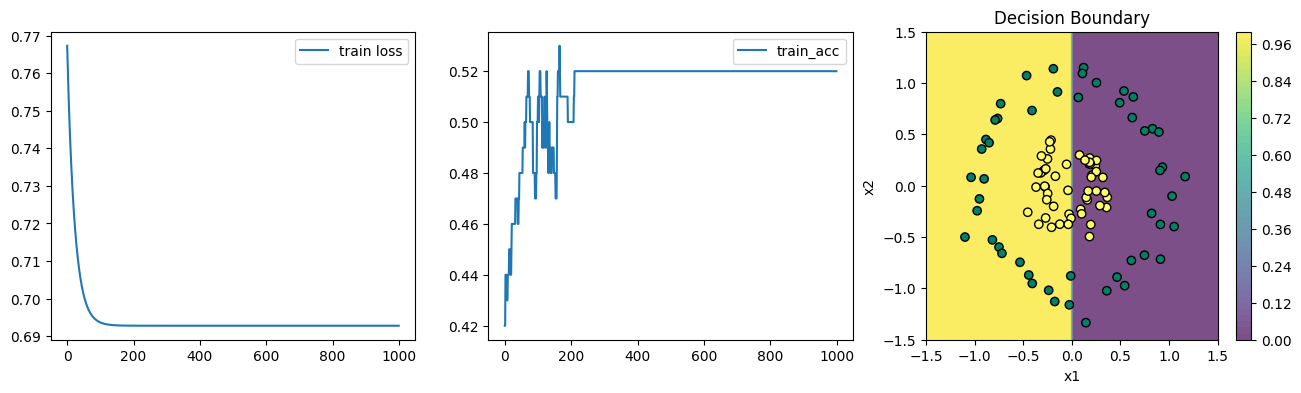

accuracy:  0.52


In [12]:
perceptron.plot_learning_curves(X.T, y.T, W.T, b, train_loss, train_acc)
print("accuracy: ", train_acc[-1])

## 2-2. Train - 2 layers multilayer perceptron

In [9]:
parameters, train_loss, train_acc = mlp_2layers.nn(X, y, n1=2, lr=0.03, epochs=10000)

100%|██████████| 10000/10000 [00:01<00:00, 6393.42it/s]


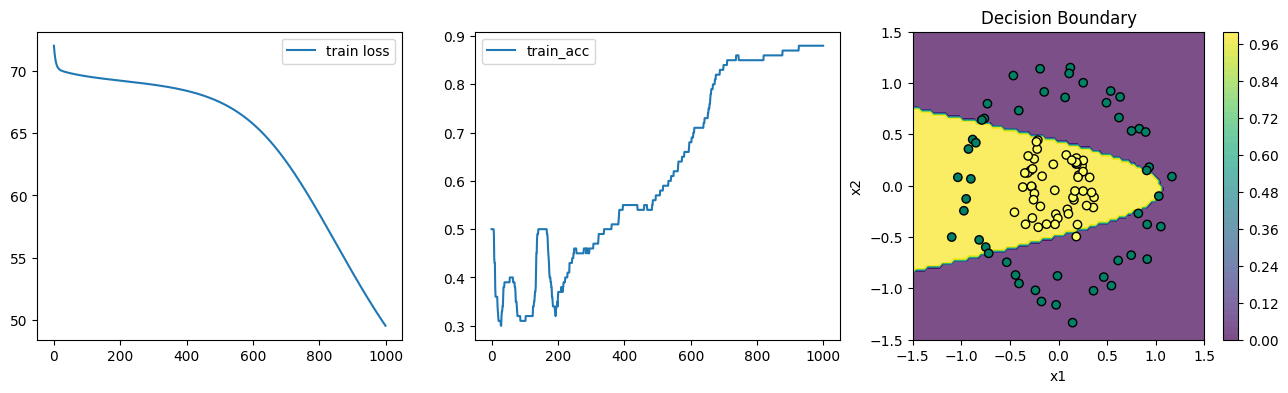

accuracy:  0.88


In [10]:
mlp_2layers.plot_learning_curves(X, y, parameters, train_loss, train_acc)
print("accuracy: ", train_acc[-1])

## 2-3. Train - 4 layers multilayer perceptron

In [7]:
parameters, train_loss, train_acc = nn.nn(X, y, lr=0.03, epochs=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1303.54it/s]


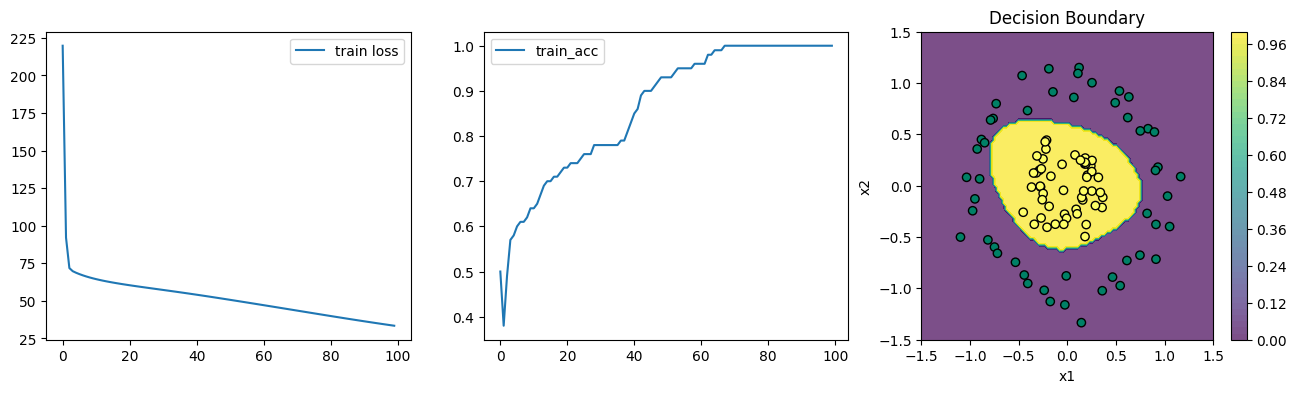

accuracy:  1.0


In [8]:
nn.plot_learning_curves(X, y, parameters, train_loss, train_acc)
print("accuracy: ", train_acc[-1])

# 3. Dataset3

In [8]:
def load_data():
    train_dataset = h5py.File('../datasets/CAT_DOG/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('../datasets/CAT_DOG/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [9]:
x_train, y_train, x_test,y_test = load_data()

In [10]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500]))


In [11]:
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100]))


In [12]:
x_train = x_train.reshape(x_train.shape[0], -1) / x_train.max()
x_test = x_test.reshape(x_test.shape[0], -1) / x_test.max()

print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(1000, 4096)
(1000, 1)
(array([0., 1.]), array([500, 500]))
(200, 4096)
(200, 1)
(array([0., 1.]), array([100, 100]))


## 3-1. Train - 1 layer perceptron

100%|██████████| 5000/5000 [00:43<00:00, 115.34it/s]


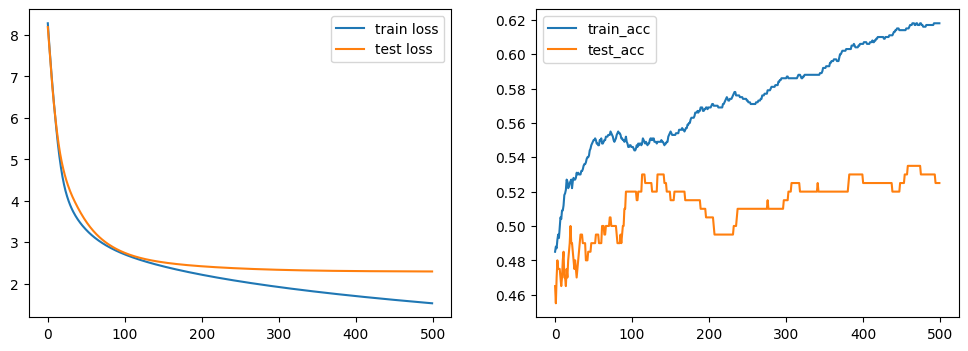

In [19]:
W, b, train_loss, train_acc = perceptron.nn(x_train, y_train, x_test, y_test, lr=0.01, epochs=5000, plot_graph=True)

## 3-2. Train - 2 layer multilayer perceptron

100%|██████████| 5000/5000 [02:17<00:00, 36.32it/s]


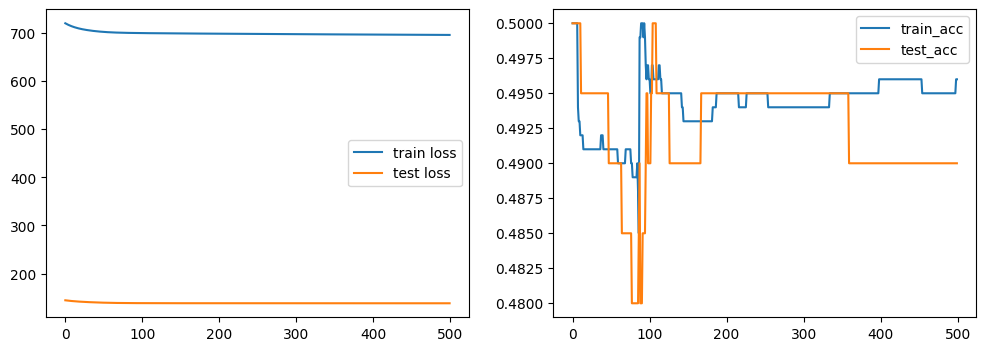

In [13]:
parameters, train_loss, train_acc = mlp_2layers.nn(x_train.T, y_train.T, n1=2, x_test=x_test.T, y_test=y_test.T, lr=0.01, epochs=5000, plot_graph=True)

In [ ]:
#mlp_2layers.plot_learning_curves(x_train.T, y_train.T, parameters, train_loss, train_acc)

## 3-3. Train - 4 layer multilayer perceptron

100%|██████████| 5000/5000 [04:24<00:00, 18.90it/s]


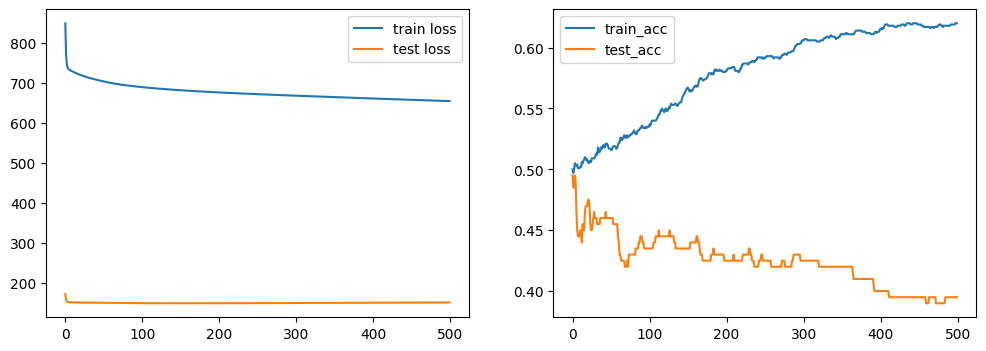

In [14]:
parameters, train_loss, train_acc = nn.nn(x_train.T, y_train.T, x_test=x_test.T, y_test=y_test.T, lr=0.01, epochs=5000, plot_graph=True)